In [210]:
def importdata():
    df = pd.read_csv('../data/df_points_valid_geo_split_at_midnight_add_h3_index_v100.csv')
    df = df[['bike_id','lat','lng','timestood','time_start','time_end','flag','hex_id']]
    
    df['time_start'] = pd.to_datetime(df['time_start'])
    
    return df

In [211]:
def create_onedf_hexid(df,hex_id):
    onedfhexid = pd.DataFrame(columns= ['bike_id','lat','lng','timestood','time_start','time_end','flag','hex_id'])
    for ind in df.index:
        if df['hex_id'][ind] == hex_id:
            onedfhexid.loc[df.index[ind]] = df.iloc[ind]
            #onedfhexid.append(df[ind], ignore_index = True)
    return onedfhexid.reset_index(drop=True)

In [212]:
def create_tsdata():
    rng = pd.date_range('2019-01-01', periods=365, freq='D')
    tsdata = pd.DataFrame({ 'date': rng, 'idle_time' : np.nan}) 
    return tsdata.set_index('date')

In [213]:
def add_rows_to_days(tsdata,onedfhexid):
    # iteriere über alle Tage
    for date in tsdata.index:
        list = []
        # Adde alle Rows in die List wenn Tag = Tag
        for ind in onedfhexid.index:
            #print(onedfhexid['time_start'][ind].date())
            if date.date() == onedfhexid['time_start'][ind].date():
                list.append(onedfhexid['timestood'][ind])
        # Setze Mittelwert für Tage
        if len(list) == 0:
            #tsdata['idle_time'][date] = 0
            continue
        else:
            tsdata['idle_time'][date] = statistics.mean(list)
    return tsdata

In [214]:
def plot(x):
    # setting figure size to 12, 10
    plt.figure(figsize=(12, 10))
 
    # Labelling the axes and setting
    # a title
    plt.xlabel("date")
    plt.ylabel("idle_time")
     
    # plotting the "A" column alone
    plt.plot(x)

In [215]:
def fix_missing_values(tsdata):
    data_freq = tsdata.asfreq('D')
    data_freq = data_freq.ffill()
    return data_freq

# Main

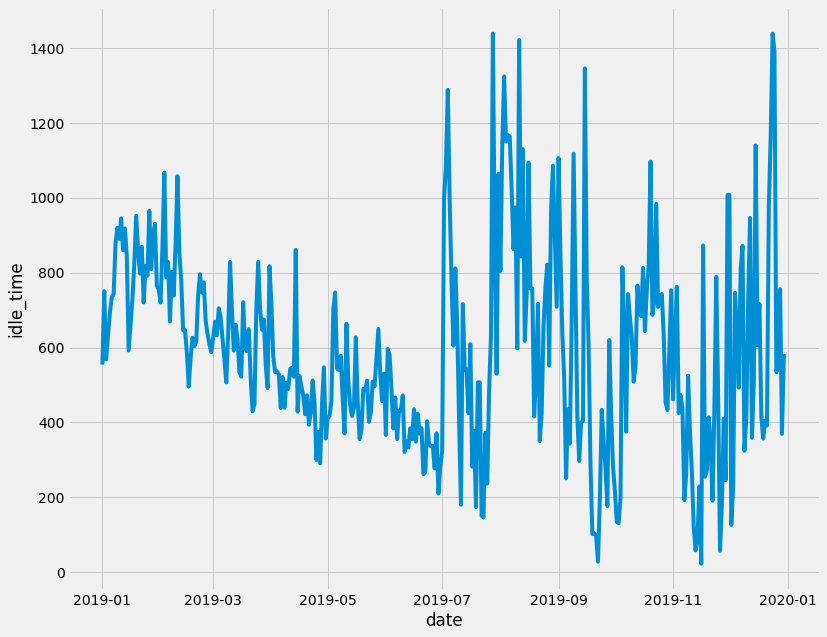

In [216]:
import pandas as pd
pd.options.mode.chained_assignment = None
from tqdm import tqdm
from datetime import timedelta, datetime, date
pd.set_option('display.max_rows', None)

import numpy as np
import statistics
import matplotlib.pyplot as plt


year = 2019
hex_id = '8a1f1a8d9d97fff'

df = importdata()

#mydf = getmosthexid(df)

#new_val = max(mydf, key= lambda x: mydf[x])
#print("maximum value from dictionary:",new_val)

#print(maximum_val)

onedfhexid = create_onedf_hexid(df,hex_id)
#onedfhexid

tsdata = create_tsdata()
#tsdata

tsdata = add_rows_to_days(tsdata,onedfhexid)

data_freq = fix_missing_values(tsdata)

plot(data_freq)

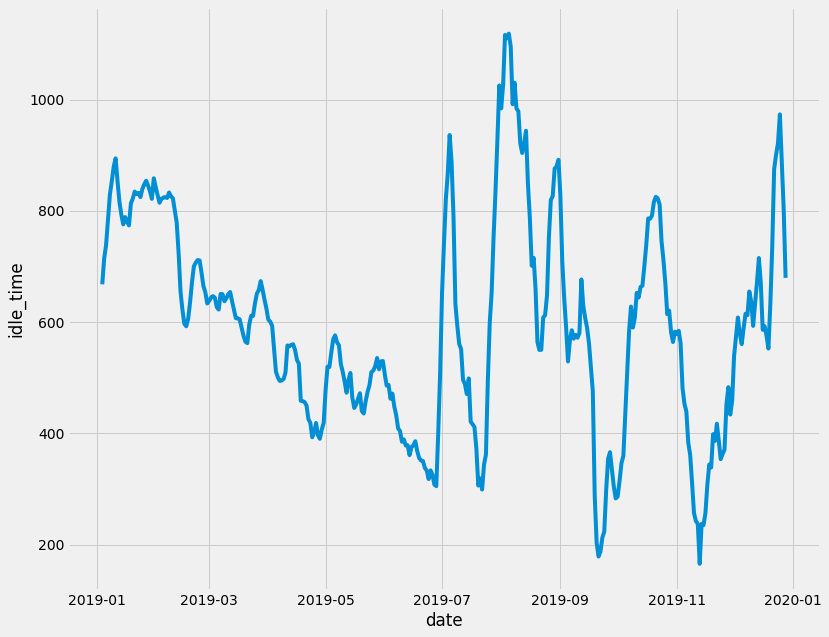

In [217]:
data_columns = ['idle_time']
data_7d_rol = data_freq[data_columns].rolling(window = 7, center = True).mean()
plot(data_7d_rol)

In [203]:
def getmosthexid(df):
    import pandas as pd
    from tqdm import tqdm

    myDFs = {}

    for ind in tqdm(df.index):
        if df['hex_id'][ind] not in myDFs:
            myDFs[df['hex_id'][ind]] = 0
            
    for ind in tqdm(df.index):
        if df['hex_id'][ind] in myDFs:
            myDFs[df['hex_id'][ind]] += 1

    return myDFs